# Generate synthetic spectra using ramanchada2

In [1]:
import ramanchada2 as rc2
import ipywidgets as ipyw
import numpy as np
import matplotlib.pyplot as plt

spe_tmp = {'orig': rc2.spectrum.from_delta_lines(deltas={500:1e3, 900:1.5e3})}
def convolve(lineshape, sigma):
    spe_tmp['convolved'] = spe_tmp['orig'].convolve(lineshape=lineshape, sigma=sigma)
    spe_tmp['convolved'].plot()
def add_baseline(n_freq, amplitude, pedestal, rng_seed, a1, a2):
    spe_tmp['baseline'] = spe_tmp['convolved'].add_baseline(n_freq=n_freq, amplitude=amplitude, pedestal=pedestal, rng_seed=rng_seed, func=lambda x: x*a1 + x**2*a2)
    spe_tmp['baseline'].plot()
def add_noise(scale, rng_seed):
    spe_tmp['noise'] = spe_tmp['baseline'].add_poisson_noise(scale=scale, rng_seed=rng_seed)
    spe_tmp['noise'].plot()

## end-to-end example

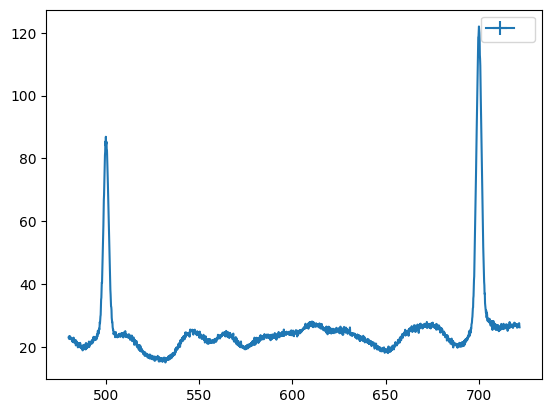

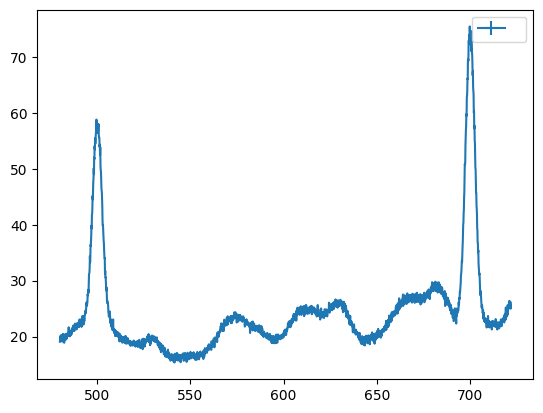

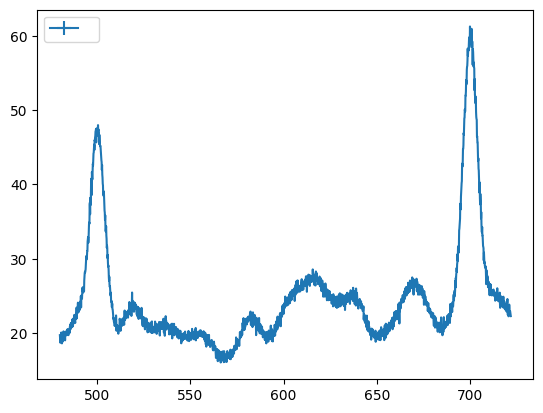

In [2]:
for sigma in [10, 20, 30]:
    spe = rc2.spectrum.from_delta_lines(deltas={500:1e3, 700:1.5e3})
    spe = spe.convolve(lineshape='voigt', sigma=sigma, gamma=3)
    spe = spe.add_baseline(n_freq=50, amplitude=10, pedestal=10, func=lambda x: x*.006 + x**2*.00001)
    spe = spe.add_poisson_noise(scale=.01)
    spe.plot()

## documentation of the methods

In [3]:
help(rc2.spectrum.from_delta_lines)

Help on function from_delta_lines in module ramanchada2.spectrum.creators.from_delta_lines:

from_delta_lines(deltas: Dict[float, float], xcal: Optional[Callable[[float], float]] = None, nbins: typing.Annotated[int, Gt(gt=0)] = 2000, **kwargs)
    Generate `Spectrum` with delta lines.
    
    Args:
        deltas:
            Keys of the dictionary are the `x` positions of the deltas; values are the amplitudes of the corresponding
            deltas.
        xcal:
            Callable, optional. `x` axis calibration function.
        nbins:
            `int`, optional. Number of bins in the spectrum.
    
    Example:
    
    This will produce spectrum with 1000 bins in the range `[-1000, 2000)`:
    ```py
    xcal = lambda x: x*3 -1000, nbins=1000
    ```



In [4]:
help(spe.convolve)

Help on method convolve in module ramanchada2.spectrum.filters.convolve:

convolve(new_spe: ramanchada2.spectrum.spectrum.Spectrum, /, lineshape: Union[Callable[[Union[float, numpy.ndarray[Any, numpy.dtype[+_ScalarType_co]]]], float], numpy.ndarray[Any, numpy.dtype[+_ScalarType_co]], Literal['gaussian', 'lorentzian', 'voigt', 'pvoigt', 'moffat', 'pearson4', 'pearson7']], **kwargs) method of ramanchada2.spectrum.spectrum.Spectrum instance
    Convole spectrum with arbitrary lineshape.
    
    Args:
        old_spe: internal use only
        new_spe: internal use only
        lineshape:callable, `str` or `np.ndarray`.
             If callable: should have a single positional argument `x`, e.g.
            `lambda x: np.exp((x/5)**2)`.
            If predefined peak profile: can be `gaussian`, `lorentzian`, `voigt`,
            `pvoigt`, `moffat` or `pearson4`.
            If `np.ndarray`: lineshape in samples.
        **kwargs:
            Additional kwargs will be passed to lineshape f

In [5]:
help(spe.add_baseline)

Help on method add_baseline in module ramanchada2.spectrum.baseline.add_baseline:

add_baseline(new_spe: ramanchada2.spectrum.spectrum.Spectrum, /, n_freq: int, amplitude: float, pedestal: float = 0, func: Optional[Callable] = None, rng_seed=None) method of ramanchada2.spectrum.spectrum.Spectrum instance
    Add artificial baseline to the spectrum.
    A random baseline is generated in frequency domain using uniform random numbers.
    The baseline in frequency domain is tapered with bohman window to reduce the bandwidth
    of the baseline to first `n_freq` frequencies and is transformed to "time" domain.
    Additionaly by using `func` parameter the user can define arbitrary function
    to be added as baseline.
    
    Args:
        n_freq:
            Must be `> 2`. Number of lowest frequency bins distinct from zero.
        amplitude:
            Upper boundary for the uniform random generator.
        pedestal:
            Additive constant pedestal to the spectrum.
        func

In [6]:
help(spe.add_poisson_noise)

Help on method add_poisson_noise in module ramanchada2.spectrum.filters.add_poisson_noise:

add_poisson_noise(new_spe: ramanchada2.spectrum.spectrum.Spectrum, /, scale: float = 1, rng_seed=None) method of ramanchada2.spectrum.spectrum.Spectrum instance
    Add poisson noise to the spectrum.
    
    For each particular sample the noise is proportional to $\sqrt{scale*a_i}$.
    
    Args:
        old_spe: internal use only
        new_spe: internal use only
        scale:
            `float`, optional, default is `1`. Scale the amplitude of the noise.
        rng_seed:
            `int` or rng state, optional. Seed for the random generator.
            If a state is provided, it is updated in-place.
    
    Returns: modified Spectrum



## Interactive example

In [7]:
ipyw.interact(
    convolve,
    lineshape=ipyw.widgets.Dropdown(options=['voigt', 'gaussian', 'lorentzian', 'pvoigt', 'moffat']),
    sigma=ipyw.widgets.FloatSlider(min=1, max=50, value=5),
)
None

interactive(children=(Dropdown(description='lineshape', options=('voigt', 'gaussian', 'lorentzian', 'pvoigt', …

In [8]:
ipyw.interact(
    add_baseline,
    n_freq=ipyw.widgets.IntSlider(min=3, max=500, value=50),
    a1=ipyw.widgets.FloatSlider(min=-.2, max=.2, value=.0, step=.00001),
    a2=ipyw.widgets.FloatSlider(min=-.0002, max=.0002, value=.0, step=.00001,  readout_format='.5f'),
    amplitude=ipyw.widgets.FloatSlider(min=0, max=50, value=10),
    pedestal=ipyw.widgets.FloatSlider(min=1, max=50, value=10),
    rng_seed=ipyw.widgets.IntSlider(min=0, max=999999, value=0)
)
None

interactive(children=(IntSlider(value=50, description='n_freq', max=500, min=3), FloatSlider(value=10.0, descr…

In [9]:
ipyw.interact(
    add_noise,
    scale=ipyw.widgets.FloatSlider(min=0, max=2, value=.01),
    rng_seed=ipyw.widgets.IntSlider(min=0, max=999999, value=0)
)
None

interactive(children=(FloatSlider(value=0.01, description='scale', max=2.0), IntSlider(value=0, description='r…

<Axes: >

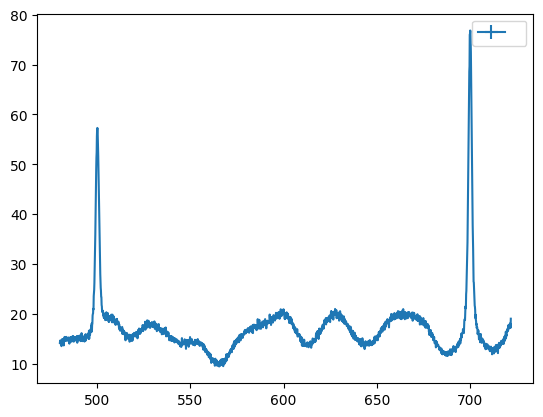

In [10]:
import ramanchada2 as rc2
spe = rc2.spectrum.from_delta_lines(deltas={500:1e3, 700:1.5e3})
spe = spe.convolve(lineshape='voigt', sigma=5)
spe = spe.add_baseline(n_freq=50, amplitude=10, pedestal=10)
spe = spe.add_poisson_noise(scale=.01)
spe.plot()

## convolution usage

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\tmp\\convolve.png'

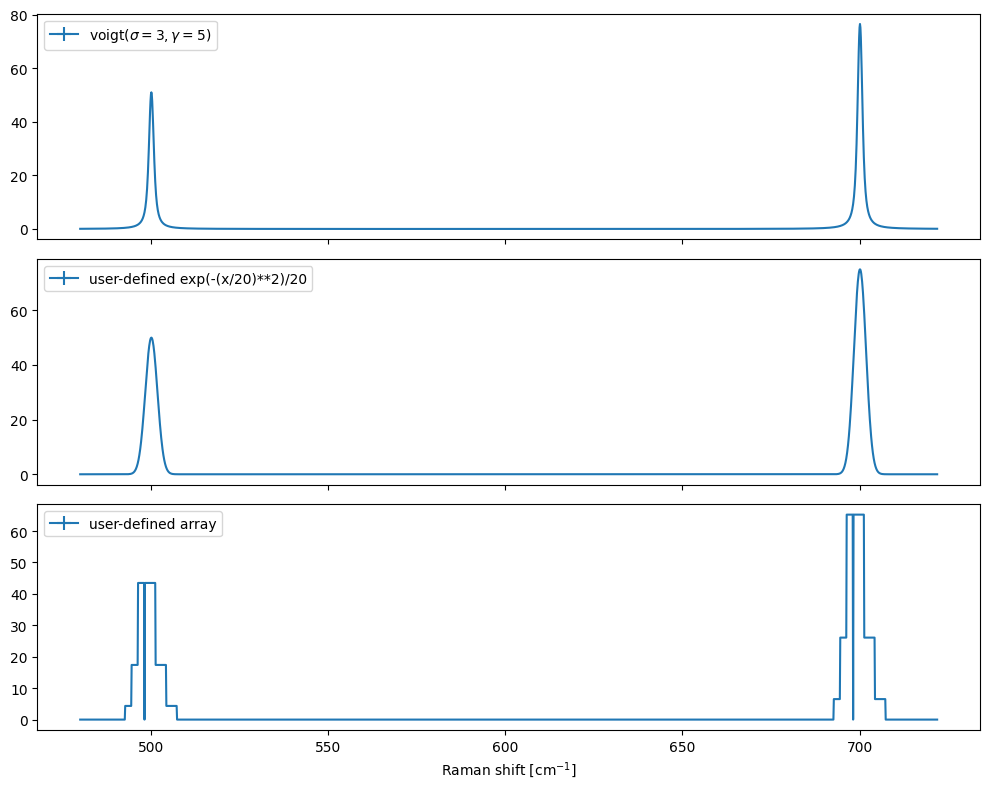

In [11]:
spe = rc2.spectrum.from_delta_lines(deltas={500:1e3, 700:1.5e3})
fig, ax = plt.subplots(nrows=3, figsize=(10, 8), sharex=True, tight_layout=True)
spe.convolve(lineshape='voigt', sigma=3, gamma=5).plot(label=r'voigt$(\sigma=3, \gamma=5)$', ax=ax[0])
spe.convolve(lineshape=np.array([.1]*15+[.4]*15+[1]*15+[0]+[1]*25+[.4]*25+[.1]*25)/23).plot(label='user-defined array', ax=ax[2])
spe.convolve(lineshape=lambda x, w: np.exp(-(x/w)**2)/20, w=20).plot(label='user-defined exp(-(x/20)**2)/20', ax=ax[1])
ax[2].set_xlabel('Raman shift [$\mathrm{cm}^{-1}$]')
fig.savefig('/tmp/convolve.png')

In [ ]:

fig, ax = plt.subplots(nrows=3, figsize=(10, 8), sharex=True, tight_layout=True)
speconv = spe.convolve(lineshape='voigt', sigma=3, gamma=5)
ax[0].set_title('n_freq=50; amplitude=50; fun$(x)=0.006\,x + 0.0001\,x^2$')
speconv.add_baseline(n_freq=50, amplitude=50, pedestal=10, func=lambda x: x*.006 + x**2*.0001).plot(ax=ax[0])
speconv.add_baseline(n_freq=50, amplitude=50, pedestal=10, func=lambda x: x*.006 + x**2*.0001).plot(ax=ax[0])
speconv.add_baseline(n_freq=50, amplitude=50, pedestal=10, func=lambda x: x*.006 + x**2*.0001).plot(ax=ax[0])
#speconv.add_baseline(n_freq=50, amplitude=50, pedestal=10, func=lambda x: x*.006 + x**2*.0001).plot(ax=ax[0])
ax[1].set_title('n_freq=150; amplitude=20; fun$(x)=0.006\,x + 0.0001\,x^2$')
speconv.add_baseline(n_freq=150, amplitude=20, pedestal=10, func=lambda x: x*.006 + x**2*.0001).plot(ax=ax[1])
speconv.add_baseline(n_freq=150, amplitude=20, pedestal=10, func=lambda x: x*.006 + x**2*.0001).plot(ax=ax[1])
speconv.add_baseline(n_freq=150, amplitude=20, pedestal=10, func=lambda x: x*.006 + x**2*.0001).plot(ax=ax[1])
#speconv.add_baseline(n_freq=150, amplitude=20, pedestal=10, func=lambda x: x*.006 + x**2*.0001).plot(ax=ax[1])
ax[2].set_title('n_freq=20; amplitude=20; fun$(x)=-1.5\,x + 0.001\,x^2$')

speconv.add_baseline(n_freq=20, amplitude=20, pedestal=10, func=lambda x: 600-x*1.5 + x**2*.001).plot(ax=ax[2])
speconv.add_baseline(n_freq=20, amplitude=20, pedestal=10, func=lambda x: 600-x*1.5 + x**2*.001).plot(ax=ax[2])
speconv.add_baseline(n_freq=20, amplitude=20, pedestal=10, func=lambda x: 600-x*1.5 + x**2*.001).plot(ax=ax[2])
ax[2].set_xlabel('Raman shift [$\mathrm{cm}^{-1}$]')

fig.savefig('/tmp/baseline.png')

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(10, 8), sharex=True, tight_layout=True)

spe_baseline = speconv.add_baseline(n_freq=20, amplitude=20, pedestal=10, func=lambda x: 600-x*1.5 + x**2*.001)
ax[0].set_title('scale=0.01')
spe_baseline.add_poisson_noise(scale=.01).plot(ax=ax[0], alpha=.8, fmt=':')
spe_baseline.add_poisson_noise(scale=.01).plot(ax=ax[0], alpha=.8, fmt=':')
spe_baseline.add_poisson_noise(scale=.01).plot(ax=ax[0], alpha=.8, fmt=':')

ax[1].set_title('scale=0.05')
spe_baseline.add_poisson_noise(scale=.05).plot(ax=ax[1], alpha=.8, fmt=':')
spe_baseline.add_poisson_noise(scale=.05).plot(ax=ax[1], alpha=.8, fmt=':')
spe_baseline.add_poisson_noise(scale=.05).plot(ax=ax[1], alpha=.8, fmt=':')

ax[2].set_title('scale=0.2')
spe_baseline.add_poisson_noise(scale=.2).plot(ax=ax[2], alpha=.8, fmt=':')
spe_baseline.add_poisson_noise(scale=.2).plot(ax=ax[2], alpha=.8, fmt=':')
spe_baseline.add_poisson_noise(scale=.2).plot(ax=ax[2], alpha=.8, fmt=':')
ax[2].set_xlabel('Raman shift [$\mathrm{cm}^{-1}$]')

fig.savefig('/tmp/noise.png')

In [ ]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 8))
markersize = 2




spe_deltas = rc2.spectrum.from_delta_lines(deltas={800:1e3, 1800:1.5e3, 2500:1e3})
spe_initial = spe_deltas.resample_NUDFT_filter(xnew_bins=100).convolve(lineshape='voigt', sigma=.1, gamma=1)
spe_baseline = spe_initial.add_baseline(n_freq=30, amplitude=50, pedestal=10, func=lambda x: x*.05 - .00001*x**2)
spe_complete = spe_baseline.add_poisson_noise(scale=.5)
spe_scaled = spe_complete.scale_xaxis_fun(lambda x: x**2*.0001 + x*.22)
spe_nobaseline = spe_scaled.subtract_moving_minimum(6)
spe_resampled = spe_nobaseline.resample_NUDFT_filter(xnew_bins=100, x_range=(0, 2500))
spe_normalized = spe_resampled.normalize()



spe_initial.plot(ax=ax[0], fmt='.', label='Original', markersize=markersize)

spe_complete.plot(ax=ax[0], fmt='.', label='Baseline + noise', markersize=markersize)

spe_scaled.plot(ax=ax[1], fmt=".", markersize=markersize, label='Scaled $xnew = 10^{-4}\,x^2 + 0.22\,x$')
ax[1].legend(loc='upper left')
spe_normalized.plot(ax=ax[1].twinx(), fmt=".r", markersize=markersize, label='mov_min + resampling + normalize')
fig.savefig('/tmp/xscale_nudft.png')